In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
haberman_df=pd.read_csv('haberman.csv', names=['age', 'operation_year', 'num_axilliary_nodes', 'survival_status'])

# Dataset description

This dataset was generated as result of a study conducted at University of Chicago's Billings hospital on survival status of patients who had undergone cancer surgery between the year 1958-1970 <br>

Number of instances = 306 <br>
Number of independant variables / features = 3 <br>

### Class labels
1 : patient survived 5 years or longer, Count = 225 <br>
2 : patient died within 5 years of surgery, Count = 81 <br>

### Features
Age : Numerical <br>
Year of operation - 1900 : Numerical <br>
Number of positive axillary nodes detected : Numerical <br>

### Axillary nodes
Lymphatic system in human body is responsible for detection of chemical changes and indication of infection. Lymph nodes are part of this system and are placed in parts of body including axils (armpits). The first spread of cancer takes place to these axillary nodes. <br>

One study conducted in past emphasises the role of number of positive axillary nodes detected as primary prognostic discriminant for cancer survival.
<a href="https://www.ncbi.nlm.nih.gov/pubmed/6352003">Relation of number of positive axillary nodes to the prognosis of patients with primary breast cancer. An NSABP update.</a>

### Objective
Determine the best feature of the 3 that can be used to predict survival status of a new patient.

In [3]:
transformation_dict={1:'survived', 2: 'not_survived'}
haberman_df['survival_status']=haberman_df.survival_status.apply(lambda x: transformation_dict[x])

In [83]:
haberman_df.head()

,age,operation_year,num_axilliary_nodes,survival_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [84]:
haberman_df.describe()

,age,operation_year,num_axilliary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [4]:
subjects_survived=haberman_df[haberman_df['survival_status']=='survived']

In [5]:
subjects_not_survived=haberman_df[haberman_df['survival_status']=='not_survived']

In [108]:
subjects_not_survived.describe()

,age,operation_year,num_axilliary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


In [10]:
subjects_survived.describe()

,age,operation_year,num_axilliary_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


1. 75% of subjects who survived have less than 3 axillary nodes whereas 75% of those who didn't survive have less than 11 nodes.
2. Mean value of nodes among subjects who survived is about 4.66 units less than in those who didn't survive

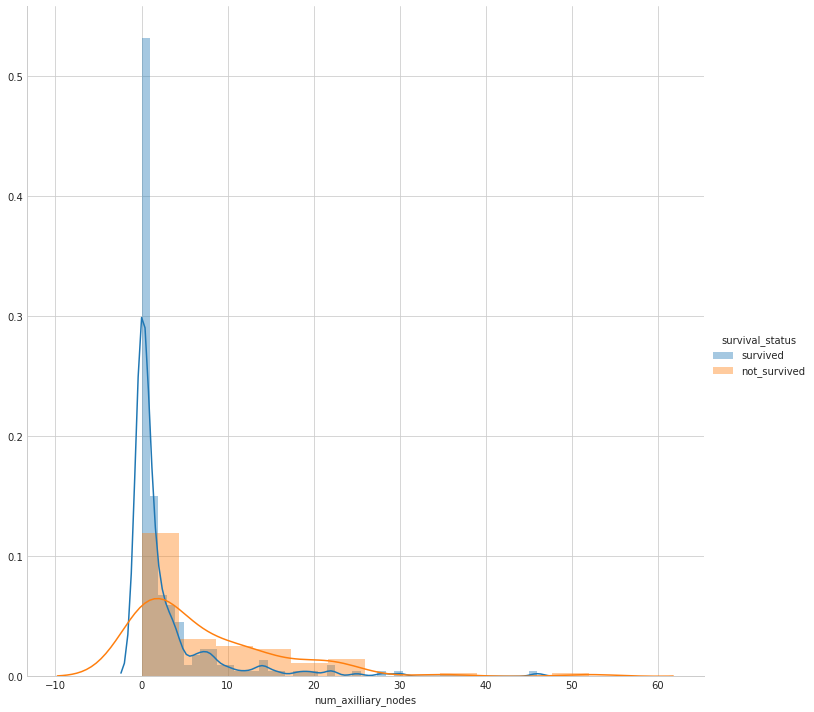

In [87]:
sns.FacetGrid(haberman_df, hue='survival_status', size=10).map(sns.distplot, 'num_axilliary_nodes').add_legend()

## Univariate analysis using number of axillary nodes
There is lot of overlap between 2 pdfs and clearly the 2 classes cannot be seperated on basis of number of positive axillary nodes. Following conclusions can be drawn<br>
1. For number of axillary nodes < 2 there is higher number of patients surviving as compared to those not surviving<br>
2. For axillary nodes lying between 2 and 4 there is higher probability of patient not surviving<br>
3. For axillary nodes between 4 and 5 there is more chance of survival<br>
4. For axillary nodes more than 5 there is higher probability of patient not surviving

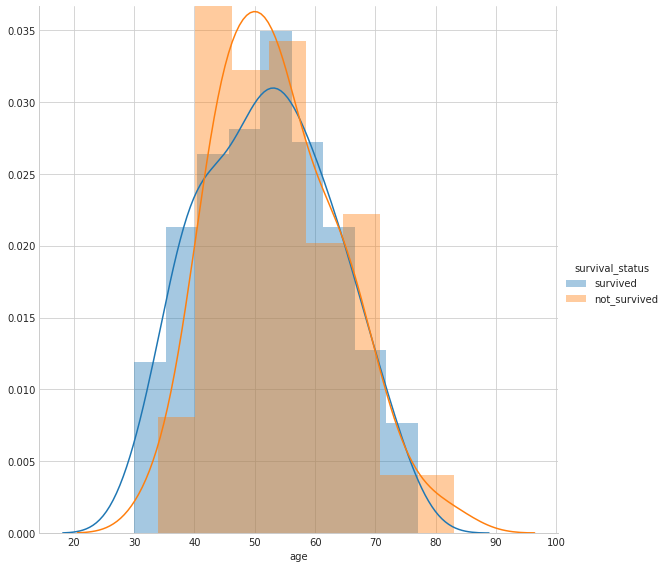

In [88]:
sns.FacetGrid(haberman_df, hue='survival_status', size=8).map(sns.distplot, 'age').add_legend()

## Univariate analysis using age of patient at time of operation
This feature again does not offer any clear seperation between the 2 classes. However the following conclusions can be drawn
1. Patients in age bracket of 30-40 have higher chances of survival as compared to those in 40-50
2. Age bracket 65-70 has lower probability of survival as compared to lower age brackets
3. No specific correlation exists between age and survival of patient. Trends are highly sporadic

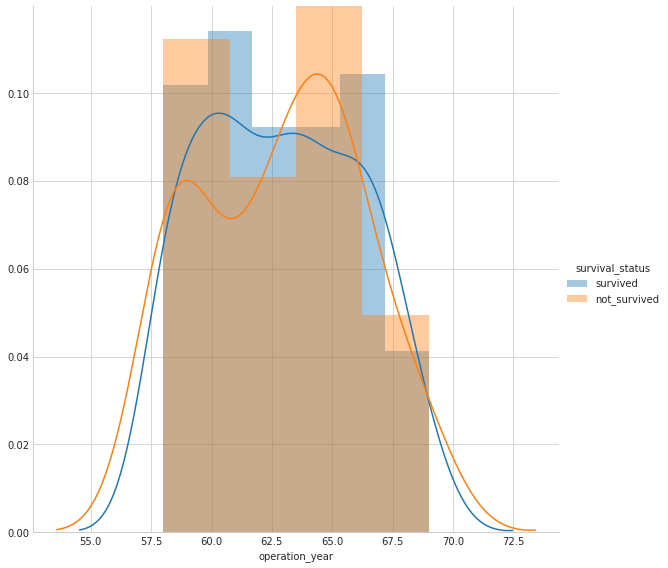

In [89]:
sns.FacetGrid(haberman_df, hue='survival_status', size=8).map(sns.distplot, 'operation_year').add_legend()

## Univariate analysis using year of operation
The 2 pdfs are overlapping like crazy. Not much inference can be drawn from this feature. However one can see that the time 1963-1966 was not good for cancer surgery. Although it is expected that with passage of time and development of medical science, survival rates should go up, but no such clear trend is observed

In [11]:
# CDF for num_axilliary_nodes
counts_nodes_survived, bin_edges_nodes_survived=np.histogram(subjects_survived['num_axilliary_nodes'], bins=100, density=True)
pdf_nodes_survived=counts_nodes_survived/sum(counts_nodes_survived)
cdf_nodes_survived=np.cumsum(pdf_nodes_survived)

counts_nodes_not_survived, bin_edges_nodes_not_survived=np.histogram(subjects_not_survived['num_axilliary_nodes'], bins=100, density=True)
pdf_nodes_not_survived=counts_nodes_not_survived/sum(counts_nodes_not_survived)
cdf_nodes_not_survived=np.cumsum(pdf_nodes_not_survived)

counts_age_survived, bin_edges_age_survived=np.histogram(subjects_survived['age'], bins=10, density=True)
pdf_age_survived=counts_age_survived/sum(counts_age_survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

counts_age_not_survived, bin_edges_age_not_survived=np.histogram(subjects_not_survived['age'], bins=10, density=True)
pdf_age_not_survived=counts_age_not_survived/sum(counts_age_not_survived)
cdf_age_not_survived=np.cumsum(pdf_age_not_survived)

counts_year_survived, bin_edges_year_survived=np.histogram(subjects_survived['operation_year'], bins=10, density=True)
pdf_year_survived=counts_year_survived/sum(counts_year_survived)
cdf_year_survived=np.cumsum(pdf_year_survived)

counts_year_not_survived, bin_edges_year_not_survived=np.histogram(subjects_not_survived['operation_year'], bins=10, density=True)
pdf_year_not_survived=counts_year_not_survived/sum(counts_year_not_survived)
cdf_year_not_survived=np.cumsum(pdf_year_not_survived)

NameError: name 'subjects_survived' is not defined

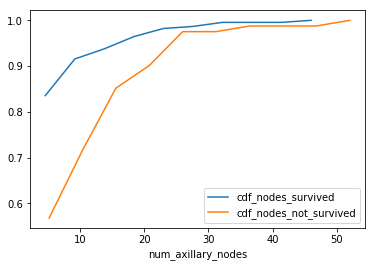

In [19]:
plt.plot(bin_edges_nodes_survived[1:], cdf_nodes_survived, label='cdf_nodes_survived')
plt.plot(bin_edges_nodes_not_survived[1:], cdf_nodes_not_survived, label='cdf_nodes_not_survived')
plt.xlabel('num_axillary_nodes')
plt.legend()

In [20]:
# percentiles
print(np.percentile(subjects_survived['num_axilliary_nodes'], [25,50,75, 90, 95,100]))
print(np.percentile(subjects_not_survived['num_axilliary_nodes'], [25,50,75, 90, 95, 100]))

[  0.   0.   3.   8.  14.  46.]
[  1.   4.  11.  20.  23.  52.]


<ul>
<li>95% of subjects who survived had num_axillary_nodes less than 14</li>
<li>95% of subjects who didn't survive had num_axillary nodes less than 23</li>
</ul>
This is again indicative of high death rates among patients with higher number of positive axillary nodes

[ 38.  41.  43.  45.  52.  60.  67.  70.  77.]
[ 42.  45.  46.  47.  53.  61.  67.  70.  83.]


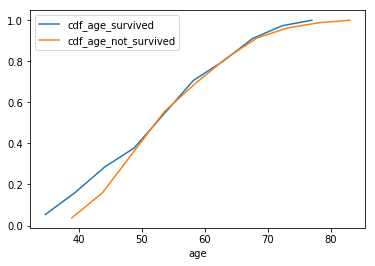

In [25]:
plt.plot(bin_edges_age_survived[1:], cdf_age_survived, label='cdf_age_survived')
plt.plot(bin_edges_age_not_survived[1:], cdf_age_not_survived, label='cdf_age_not_survived')
plt.xlabel('age')
plt.legend()

# percentiles
print(np.percentile(subjects_survived['age'], [10,20,25,30,50,75, 90, 95,100]))
print(np.percentile(subjects_not_survived['age'], [10,20,25,30,50,75, 90, 95, 100]))

In age groups above 50, percentile values of surviving and non surviving subjects are almost identical and hence no prediction can be made about survival status based on age

[ 58.  60.  60.  61.  63.  66.  67.  68.  69.]
[ 58.  59.  59.  60.  63.  65.  67.  68.  69.]


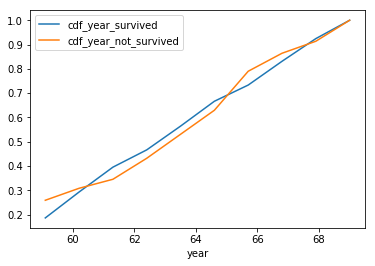

In [26]:
plt.plot(bin_edges_year_survived[1:], cdf_year_survived, label='cdf_year_survived')
plt.plot(bin_edges_year_not_survived[1:], cdf_year_not_survived, label='cdf_year_not_survived')
plt.xlabel('year')
plt.legend()

# percentiles
print(np.percentile(subjects_survived['operation_year'], [10,20,25,30,50,75, 90, 95,100]))
print(np.percentile(subjects_not_survived['operation_year'], [10,20,25,30,50,75, 90, 95, 100]))

This is clearly not a good feature for prediction as the percentile values are not differing very much for instance 95% of survived people got operated before and the same is true for those who didn't survive. Hence this feature will not be considered for further analysis

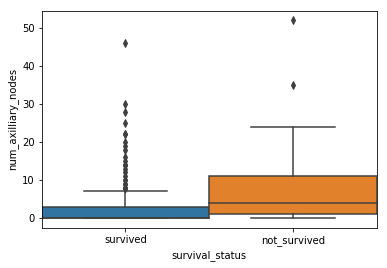

In [32]:
sns.boxplot(x='survival_status', y='num_axilliary_nodes', data=haberman_df, width=1)

1. Almost all survived subjects have less than 10 axilliary nodes and almost all of non surviving subjects have less than 26 nodes
2. 75% of surviving subjects have less than 3 nodes and 50% of non survivors had less than 4 nodes i.e. 50% of non survivors had more than 4 nodes

These observations make number of axillary nodes an ideal choice for cancer survival prediction

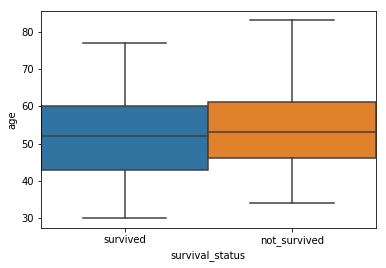

In [33]:
sns.boxplot(x='survival_status', y='age', data=haberman_df, width=1)

There is huge overlap in age groups of surviving and non surviving subjects. Even the 50%, 25% and 75% values are almost identical. A clear determination of survival status of a new subject based on age is thus not feasible

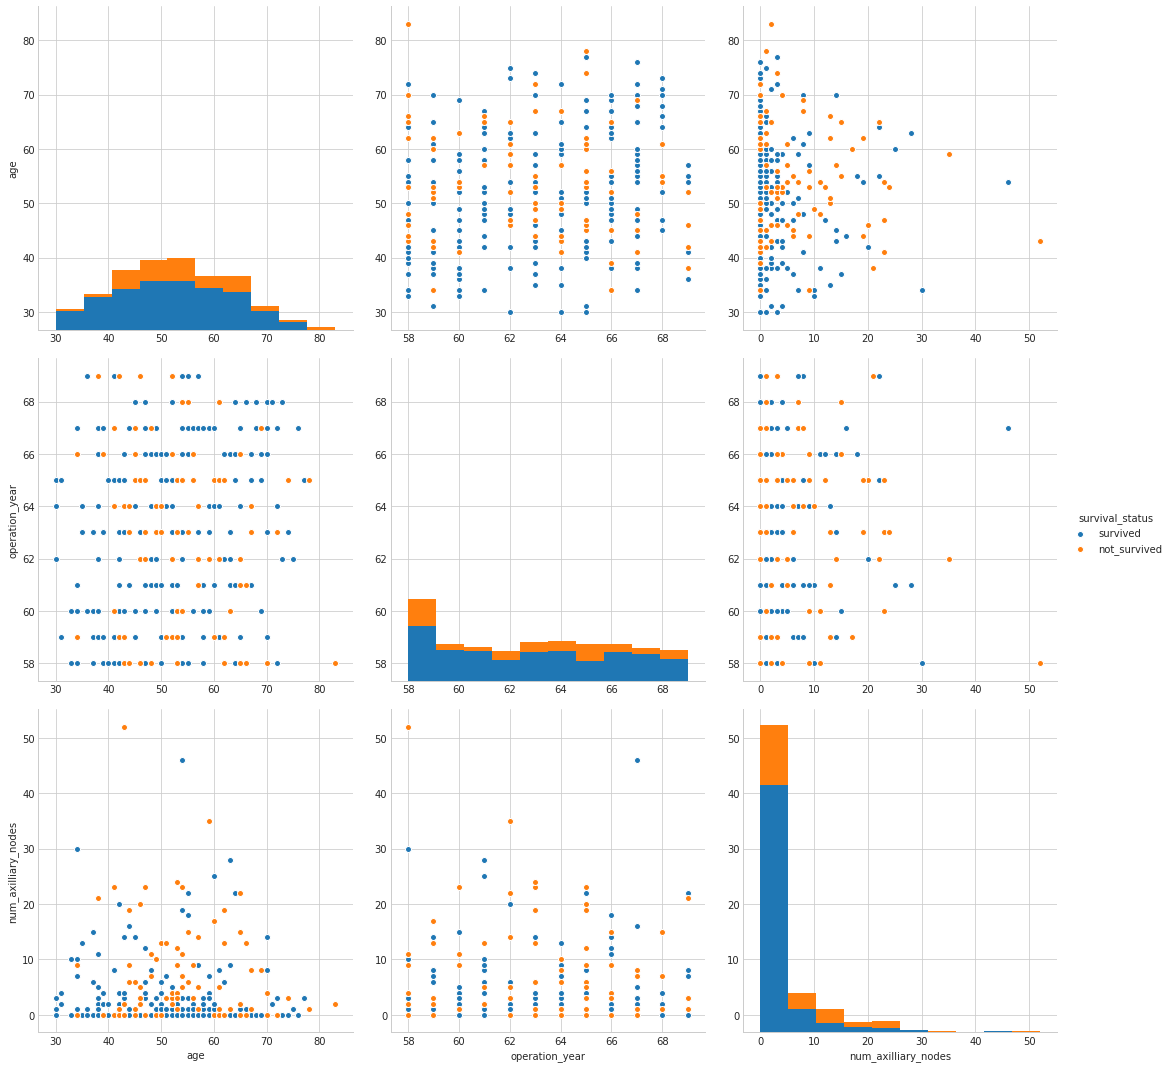

In [92]:
sns.set_style('whitegrid')
sns.pairplot(haberman_df, hue='survival_status', size=5)

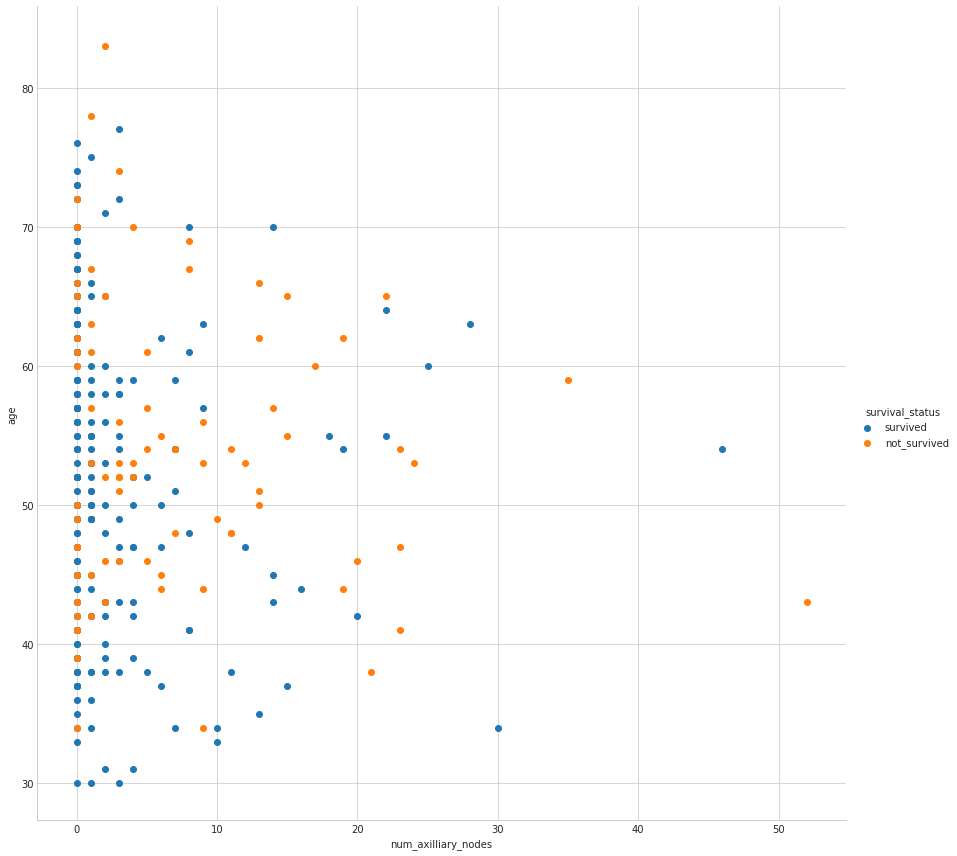

In [105]:
sns.FacetGrid(haberman_df, hue='survival_status', size=12, aspect=1).map(plt.scatter, 'num_axilliary_nodes', 'age').add_legend()

Out of three features num_axilliary_nodes and age seem most appropriate from univariate analysis. On performing bivariate analysis on these 2 features, clusters can be identified.
1. There is fairly large number of patients who survived in the age range 30-40 with only 4 patients not surviving
2. Another cluster of cancer survivors can be seen in age bracket 50-60 having axilliary nodes less than 4

Therefore, although a linear separation is not possible, a non linear activation function (sigmoid) will be able to learn this kind of mapping

# Conclusion
The order of relevance of 3 features for cancer survival prediction is<br>
num_axillary_nodes > age > operation_year<br>

In [1]:
a=[(1,2,3),(4,5,6)]

In [8]:
a[:1][2]

IndexError: list index out of range